This notebook is aimed at analyzing the career statistics of two of the UFC's most accomplished grapplers: Demian Maia and Khabib Nurmagomedov.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from sqlalchemy import create_engine
from src import local
from src import functions
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### Grappling Stats import
Here we import our grappling stats data, this has advanced statistics on reversals, submission attempts, and guard passes for every round in the UFC

In [2]:
strikes = pd.read_csv('../../data/ufcstats_data/sig_str_stats.csv')
strikes

,round,bout_link,fighter_link,sig_str_a_p1m,sig_str_s_p1m,sig_str_a_p15m,sig_str_s_p15m,sig_str_ac,sig_str_de,sig_str_s_pr_di,sig_str_a_pr_di,sig_str_s_p1m_di,sig_str_a_p1m_di,sig_str_s_p15m_di,sig_str_a_p15m_di
0,1,http://www.ufcstats.com/fight-details/11f715fa...,http://www.ufcstats.com/fighter-details/e1147d...,6.000000,2.200000,90.000000,33.000000,0.366667,0.500000,-1,6,-0.200000,1.200000,-3.000000,18.000000
1,2,http://www.ufcstats.com/fight-details/11f715fa...,http://www.ufcstats.com/fighter-details/e1147d...,6.000000,3.000000,90.000000,45.000000,0.500000,0.750000,12,18,2.400000,3.600000,36.000000,54.000000
2,3,http://www.ufcstats.com/fight-details/11f715fa...,http://www.ufcstats.com/fighter-details/e1147d...,6.400000,2.600000,96.000000,39.000000,0.406250,0.714286,7,11,1.400000,2.200000,21.000000,33.000000
3,4,http://www.ufcstats.com/fight-details/11f715fa...,http://www.ufcstats.com/fighter-details/e1147d...,6.800000,2.600000,102.000000,39.000000,0.382353,0.578947,5,15,1.000000,3.000000,15.000000,45.000000
4,5,http://www.ufcstats.com/fight-details/11f715fa...,http://www.ufcstats.com/fighter-details/e1147d...,6.200000,3.400000,93.000000,51.000000,0.548387,0.478261,5,8,1.000000,1.600000,15.000000,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25767,1,http://www.ufcstats.com/fight-details/693e4a0b...,http://www.ufcstats.com/fighter-details/669a3c...,4.400000,2.200000,66.000000,33.000000,0.500000,0.575758,-3,-11,-0.600000,-2.200000,-9.000000,-33.000000
25768,2,http://www.ufcstats.com/fight-details/693e4a0b...,http://www.ufcstats.com/fighter-details/669a3c...,3.037975,0.000000,45.569620,0.000000,0.000000,0.461538,-7,-9,-5.316456,-6.835443,-79.746835,-102.531646
25769,1,http://www.ufcstats.com/fight-details/c6f85419...,http://www.ufcstats.com/fighter-details/a54a35...,7.017544,3.508772,105.263158,52.631579,0.500000,0.541667,-12,-28,-4.210526,-9.824561,-63.157895,-147.368421
25770,1,http://www.ufcstats.com/fight-details/1db8bed8...,http://www.ufcstats.com/fighter-details/911fb2...,2.600000,1.800000,39.000000,27.000000,0.692308,NaN,9,13,1.800000,2.600000,27.000000,39.000000


In [3]:
# Credentials
USER = local.user 
PASS = local.password
HOST = local.host
PORT = local.port

#create engine
engine = create_engine(f'postgresql://{USER}:{PASS}@{HOST}:{PORT}/match_finder')

In [4]:
query = """
SELECT name, link
FROM fighters
"""

fighters = pd.read_sql(query, engine)

In [5]:
fighters.head()

,name,link
0,Fabiano Scherner,http://www.ufcstats.com/fighter-details/0bc7e6...
1,Alexandre Dantas,http://www.ufcstats.com/fighter-details/8dc46e...
2,Kevin Burns,http://www.ufcstats.com/fighter-details/a6d8bf...
3,Joseph Sandoval,http://www.ufcstats.com/fighter-details/696002...
4,Jose Aldo,http://www.ufcstats.com/fighter-details/d0f395...


In [6]:
query = """
SELECT "Date" as date, bouts.link
FROM bouts
JOIN events on events.link = bouts.event_link
"""

bouts = pd.read_sql(query, engine)

In [7]:
bouts.head()

,date,link
0,"July 25, 2020",http://www.ufcstats.com/fight-details/11f715fa...
1,"July 25, 2020",http://www.ufcstats.com/fight-details/11f715fa...
2,"July 25, 2020",http://www.ufcstats.com/fight-details/11f715fa...
3,"July 25, 2020",http://www.ufcstats.com/fight-details/11f715fa...
4,"July 25, 2020",http://www.ufcstats.com/fight-details/11f715fa...


In [8]:
strikes = strikes.join(fighters.set_index('link'), on='fighter_link')

In [9]:
strikes = strikes.join(bouts.set_index('link'), on='bout_link')

we can easily get the career averages by grouping a column by the fighters name and getting the average for whatever stat we want. First we'll look at the the Takedown Successes Differential per 15 Minutes, which is denoted as td_s_p15m_di in our table. This is a measure of how many more takedowns a fighter landed than their opponent for each 15 minutes they've fought in the UFC.

In [10]:
strikes.groupby('name').sig_str_a_p1m.mean().sort_values(ascending=False)[:30]

name
Justin Jaynes         43.902439
Khaos Williams        37.777778
Nick Denis            35.678018
Christian Aguilera    23.389831
Todd Duffee           20.552749
Julia Avila           19.736364
Chan-Mi Jeon          19.666667
Daniel Rodriguez      19.533272
Lara Procopio         19.333333
Karol Rosa            19.300000
Mariya Agapova        19.259259
Martin Bravo          18.751218
Leslie Smith          18.645414
Ronda Rousey          18.316534
Gabe Green            18.200000
Randy Costa           17.896296
Juan Manuel Puig      17.517730
Sean Woodson          16.910569
Weili Zhang           16.833255
Ryan Janes            16.831328
Paulo Costa           16.801537
Ariane Carnelossi     16.735632
Marco Polo Reyes      16.691553
Abdul-Kerim Edilov    16.492105
Matt Van Buren        16.348711
Ross Pointon          16.105471
Vernon Ramos Ho       16.000000
Sergei Pavlovich      15.979750
Xiaonan Yan           15.946667
Irene Aldana          15.873973
Name: sig_str_a_p1m, dtype: float64

It looks like we have a lot of fighters who haven't fought in the ufc very much which likely skewed their numbers pretty high. We'll filter it by fighters who have at least 3 fights in the UFC.

In [11]:
bouts_by_name = pd.DataFrame(strikes.groupby(['bout_link', 'fighter_link']).name.max())

In [12]:
number_of_bouts = bouts_by_name.groupby('name').name.count()
number_of_bouts

name
Aalon Cruz            1
Aaron Brink           1
Aaron Phillips        3
Aaron Riley           9
Aaron Rosa            3
                     ..
Zarah Fairn           2
Zarrukh Adashev       1
Zelim Imadaev         2
Zhalgas Zhumagulov    1
Zubaira Tukhugov      6
Name: name, Length: 1918, dtype: int64

Now that we have match counts for every fighter we will create a list of fighters with less than 3 bouts.

In [13]:
inexperienced_fighters = list(number_of_bouts[number_of_bouts<3].index)
len(inexperienced_fighters)

675

In [14]:
mask = strikes.name.map(lambda x: functions.black_list_entry(x, inexperienced_fighters))
strikes = strikes[mask]

In [15]:
strikes.groupby('name').sig_str_a_p1m.mean().sort_values(ascending=False)[:10]

name
Todd Duffee         20.552749
Martin Bravo        18.751218
Leslie Smith        18.645414
Ronda Rousey        18.316534
Weili Zhang         16.833255
Ryan Janes          16.831328
Paulo Costa         16.801537
Marco Polo Reyes    16.691553
Sergei Pavlovich    15.979750
Xiaonan Yan         15.946667
Name: sig_str_a_p1m, dtype: float64

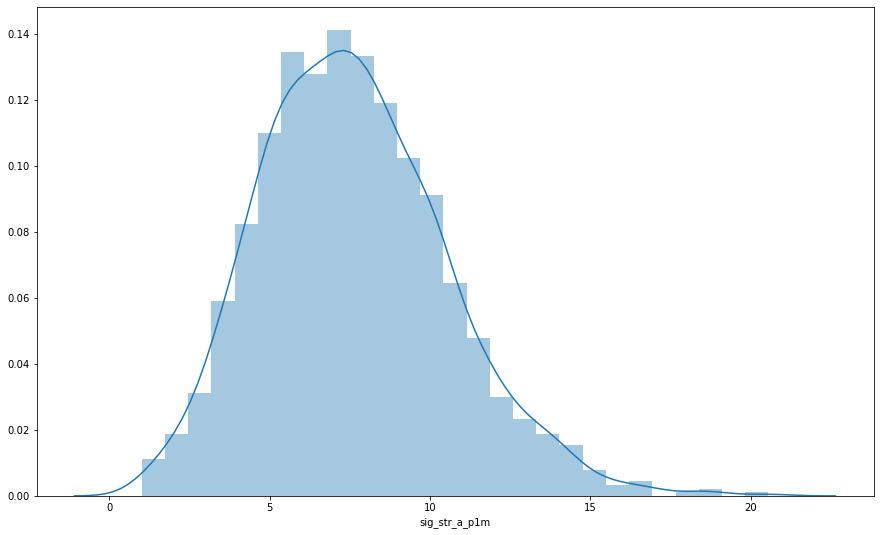

In [16]:
fig, ax = plt.subplots(1,1, figsize=(15, 9))
sns.distplot(strikes.groupby('name').sig_str_a_p1m.mean(), ax=ax)
plt.savefig('stat_dist.png')

Now we see some more familiar names. We have Khabib at #13, but we also see Ronda Rousey at #5 and Curtis Blaydes at #6. These are all highly regarded grapplers and they are all in the top 15 for 15m takedown differential. But how do they compare to the rest of the UFC? Let's see how big our list is.

#### Average Takedowns
But is a differential the best way to measure takedown ability? We could also look at the average number of successful takedowns per 15 minutes.

In [20]:
strikes.groupby('name').sig_str_s_p15m_di.mean().sort_values(ascending=False)[:20]

name
Todd Duffee          106.805038
Mark Weir             83.785400
Benji Radach          82.969792
Edmen Shahbazyan      79.676244
Kenan Song            78.775940
Devonte Smith         74.812794
Cristiane Justino     74.296909
Sergei Pavlovich      71.681543
Greg Hardy            66.454608
Weili Zhang           65.178509
Cain Velasquez        64.576199
Chan Sung Jung        64.405173
Sean O'Malley         59.604940
Cory Sandhagen        59.356299
Thiago Perpetuo       58.256922
Ion Cutelaba          57.765334
David Terrell         57.306576
Lavar Johnson         55.612228
Maycee Barber         55.151272
Ryan Janes            55.137931
Name: sig_str_s_p15m_di, dtype: float64

In [22]:
strikes[strikes['name']=='Conor McGregor'].groupby('name').sig_str_s_p15m_di.mean()

name
Conor McGregor    44.976988
Name: sig_str_s_p15m_di, dtype: float64

In [24]:
strikes[strikes['name']=='Khabib Nurmagomedov'].groupby('name').sig_str_s_p15m_di.mean()

name
Khabib Nurmagomedov    38.912196
Name: sig_str_s_p15m_di, dtype: float64

In [25]:
strikes.groupby('name').sig_str_s_p15m_di.mean().sort_values(ascending=False).describe()

count    1243.000000
mean       -2.871431
std        26.982454
min      -153.978947
25%       -15.728749
50%        -2.040810
75%        12.700608
max       106.805038
Name: sig_str_s_p15m_di, dtype: float64

You see a lot of the same names but Khabib dropped 7 places down to 20th place. In order for Khabib to be higher on the average takedown top 20, he would have to successfully land more takedowns, regardless of whether or not his opponent landed takedowns on him. If his opponents had landed more takedowns on him, he would be lower on the differential list, but he would stay at the same place on the average takedowns list. It would be ideal to have a differential that is identical to your average, because this would mean that you never gave up a takedown. What would a column look like if the takedown average was subtracted from the differential?

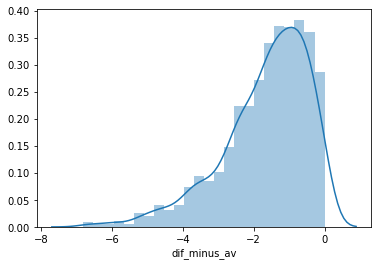

In [66]:
takedowns['dif_minus_av'] = takedowns.td_s_p15m_di - takedowns.td_s_p15m
sns.distplot(takedowns.groupby('name').dif_minus_av.mean())

In [65]:
takedowns.groupby('name').dif_minus_av.mean().sort_values()[:15]

name
Ben Alloway         -6.808143
Jason Gonzalez      -6.670549
Casey Kenney        -6.600000
Sean Soriano        -6.397527
Felipe Colares      -6.333333
Francisco Trevino   -6.112782
Rogerio Bontorin    -6.000000
Rafael Cavalcante   -5.909091
Jared Hamman        -5.900926
Drew McFedries      -5.894528
Garett Whiteley     -5.692308
Aaron Phillips      -5.630034
Ryan Jensen         -5.444704
Adam Milstead       -5.281780
James Irvin         -5.276480
Name: dif_minus_av, dtype: float64

This list doesn't have any familiar names, which is unsuprising, but if we look at the #2 spot, Jason Gonzalez, we'll notice that he fought Gregor Gilespie, our #7 ranked in takedown differential. 

This metric measures the number of takedowns that a fighter has given up and could be a good measurement of takedown defense.

### Submission attempts

In [75]:
mask = grappling.name.map(lambda x: functions.black_list_entry(x, inexperienced_fighters))
grappling = grappling[mask]

grappling.groupby('name').sub_att_p15m_di.mean().sort_values(ascending=False)[:15]

name
Ian Entwistle        19.497616
Ronda Rousey          7.800269
Sean McCorkle         7.407751
Paul Sass             7.218045
Rob Broughton         6.825243
Teemu Packalen        6.750000
Rousimar Palhares     6.291708
Genki Sudo            5.374214
TJ Waldburger         5.315116
Renato Sobral         4.920935
Patrick Williams      4.891304
Manny Bermudez        4.841381
Matt Arroyo           4.659574
Fabiano Iha           4.604762
Marcus Aurelio        4.446429
Name: sub_att_p15m_di, dtype: float64

In [78]:
grappling.groupby('name').pass_p15m_di.mean().sort_values(ascending=False)[:15]

name
Gregor Gillespie       13.220946
Tatiana Suarez         10.066494
Teemu Packalen          9.250000
Grant Dawson            8.779592
Murilo Bustamante       8.506452
Gillian Robertson       8.092862
Denis Kang              7.751553
Jake Rosholt            7.506276
Ronda Rousey            6.498034
Aspen Ladd              6.140637
Edmen Shahbazyan        5.666667
Claudio Silva           5.578009
Khabib Nurmagomedov     5.429699
Jimy Hettes             5.357632
Misha Cirkunov          5.107617
Name: pass_p15m_di, dtype: float64

In [80]:
grappling['combined_grappling_p15m_di'] = grappling['pass_p15m_di'] + grappling['sub_att_p15m_di'] + grappling['rev_p15m_di']
grappling.groupby('name').combined_grappling_p15m_di.mean().sort_values(ascending=False)[:20]

name
Ronda Rousey         19.869731
Ian Entwistle        18.268107
Teemu Packalen       15.000000
Gregor Gillespie     14.348343
Murilo Bustamante    11.777419
Genki Sudo           10.224538
Manny Bermudez       10.101642
Grant Dawson         10.010204
Gillian Robertson     9.435001
Tatiana Suarez        9.286136
Rousimar Palhares     8.947319
Misha Cirkunov        8.585120
TJ Waldburger         7.997151
Edmen Shahbazyan      7.750000
Diego Ferreira        7.694718
Joe Duffy             7.310531
Denis Kang            7.285714
Joe Lauzon            7.177872
Livinha Souza         6.904762
Claudio Silva         6.904596
Name: combined_grappling_p15m_di, dtype: float64

In [84]:
av_sub_att = grappling.groupby('name').sub_att_p15m_di.mean()

av_sub_att[av_sub_att.index == 'Demian Maia']

name
Demian Maia    1.045441
Name: sub_att_p15m_di, dtype: float64

In [86]:
av_rev = grappling.groupby('name').rev_p15m_di.mean()

av_rev[av_rev.index == 'Demian Maia']

name
Demian Maia   -0.023621
Name: rev_p15m_di, dtype: float64

In [87]:
av_pass = grappling.groupby('name').pass_p15m_di.mean()

av_pass[av_pass.index == 'Demian Maia']

name
Demian Maia    3.722007
Name: pass_p15m_di, dtype: float64